In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from empyrical import max_drawdown
from empyrical import sharpe_ratio
from empyrical import sortino_ratio

In [151]:
ohlcv = pd.read_csv(r'C:\Users\tanus\Downloads\data\btcusdt_1h.csv')
ohlcv['datetime'] = pd.to_datetime(ohlcv['datetime'])

ohlcv.set_index('datetime', inplace=True)

daily_data = ohlcv.resample('1D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

daily_data.fillna(method='ffill', inplace=True)


daily_data.reset_index(inplace=True)
daily_data

,datetime,open,high,low,close,volume
0,2018-01-01,13715.65,13818.55,12750.00,13135.00,6970.441076
1,2018-01-02,13135.00,14750.00,12890.02,14580.00,16359.347340
2,2018-01-03,14576.87,15473.49,14150.00,14749.97,19457.238601
3,2018-01-04,14710.00,15280.00,13918.04,14811.00,18783.876561
4,2018-01-05,14805.01,17118.13,14600.00,16579.00,22383.657333
...,...,...,...,...,...,...
1468,2022-01-08,41707.04,42246.37,40501.00,40679.82,27031.900870
1469,2022-01-09,40679.82,42300.00,40520.00,41966.99,27291.009660
1470,2022-01-10,41966.99,42786.70,39650.00,41604.58,51064.904360
1471,2022-01-11,41604.58,43100.00,41158.99,42755.00,38062.818280


In [152]:
bear=pd.read_csv(r'C:\Users\tanus\Downloads\data\bear_market (1).csv')
bear

,Unnamed: 0,datetime,date,time,open,high,low,close,volume
0,0,2022-02-01 05:30:00,01/02/2022,05:30:00,38466.90,39265.20,38000.00,38694.59,34574.44663
1,1,2022-02-02 05:30:00,02/02/2022,05:30:00,38694.59,38855.92,36586.95,36896.36,35794.68130
2,2,2022-02-03 05:30:00,03/02/2022,05:30:00,36896.37,37387.00,36250.00,37311.61,32081.10999
3,3,2022-02-04 05:30:00,04/02/2022,05:30:00,37311.98,41772.33,37026.73,41574.25,64703.95874
4,4,2022-02-05 05:30:00,05/02/2022,05:30:00,41571.70,41913.69,40843.01,41382.59,32532.34372
...,...,...,...,...,...,...,...,...,...
329,329,2022-12-27 05:30:00,27/12/2022,05:30:00,16919.39,16972.83,16592.37,16706.36,173749.58616
330,330,2022-12-28 05:30:00,28/12/2022,05:30:00,16706.06,16785.19,16465.33,16547.31,193037.56577
331,331,2022-12-29 05:30:00,29/12/2022,05:30:00,16547.32,16664.41,16488.91,16633.47,160998.47158
332,332,2022-12-30 05:30:00,30/12/2022,05:30:00,16633.47,16677.35,16333.00,16607.48,164916.31174


In [153]:
strategy2=pd.read_csv(r'C:\Users\tanus\Downloads\strategy1 daily.csv')

strategy2

,Unnamed: 0,datetime,open,high,low,close,volume,MACD,Signal_MACD,tr,atr,upper_band,lower_band,in_uptrend,SuperTrend,super,trend,IBS,weight_avg,signals
0,0,2018-01-01,13715.65,13818.55,12750.00,13135.00,6970.441076,0.000000,0.000000,1068.55,NaN,NaN,NaN,True,NaN,NaN,0,0.360301,0.360301,0
1,1,2018-01-02,13135.00,14750.00,12890.02,14580.00,16359.347340,122.652520,24.530504,1859.98,NaN,NaN,NaN,True,NaN,NaN,0,0.908601,0.689281,0
2,2,2018-01-03,14576.87,15473.49,14150.00,14749.97,19457.238601,232.403789,66.105161,1323.49,NaN,NaN,NaN,True,NaN,NaN,0,0.453324,0.577512,0
3,3,2018-01-04,14710.00,15280.00,13918.04,14811.00,18783.876561,321.580106,117.200150,1361.96,NaN,NaN,NaN,True,NaN,NaN,0,0.655643,0.609967,0
4,4,2018-01-05,14805.01,17118.13,14600.00,16579.00,22383.657333,538.490042,201.458128,2518.13,NaN,NaN,NaN,True,NaN,NaN,0,0.785901,0.677505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1468,2022-01-08,41707.04,42246.37,40501.00,40679.82,27031.900870,-2392.123514,-1789.951663,1745.37,2093.715,53935.975,50272.138,True,50272.138,50272.138,-1,0.102454,0.236712,0
1469,1469,2022-01-09,40679.82,42300.00,40520.00,41966.99,27291.009660,-2498.736854,-1931.708702,1780.00,2073.008,53848.048,50272.138,True,50272.138,50272.138,-1,0.812916,0.428780,-1
1470,1470,2022-01-10,41966.99,42786.70,39650.00,41604.58,51064.904360,-2586.976469,-2062.762255,3136.70,2181.852,54309.462,50272.138,True,50272.138,50272.138,-1,0.623133,0.493564,0
1471,1471,2022-01-11,41604.58,43100.00,41158.99,42755.00,38062.818280,-2531.395089,-2156.488822,1941.01,2148.290,55019.235,50272.138,True,50272.138,50272.138,-1,0.822257,0.603129,0


In [154]:
bull=pd.read_csv(r'C:\Users\tanus\Downloads\data\bull_market (1).csv')
bull

,Unnamed: 0,datetime,date,time,open,high,low,close,volume
0,0,2023-01-01 05:30:00,01/01/2023,05:30:00,16541.77,16628.00,16499.01,16616.75,96925.41374
1,1,2023-01-02 05:30:00,02/01/2023,05:30:00,16617.17,16799.23,16548.70,16672.87,121888.57191
2,2,2023-01-03 05:30:00,03/01/2023,05:30:00,16672.78,16778.40,16605.28,16675.18,159541.53733
3,3,2023-01-04 05:30:00,04/01/2023,05:30:00,16675.65,16991.87,16652.66,16850.36,220362.18862
4,4,2023-01-05 05:30:00,05/01/2023,05:30:00,16850.36,16879.82,16753.00,16831.85,163473.56641
...,...,...,...,...,...,...,...,...,...
330,330,2023-11-27 05:30:00,27/11/2023,05:30:00,37447.42,37569.23,36707.00,37242.70,30001.07376
331,331,2023-11-28 05:30:00,28/11/2023,05:30:00,37242.70,38377.00,36868.41,37818.87,37544.46667
332,332,2023-11-29 05:30:00,29/11/2023,05:30:00,37818.88,38450.00,37570.00,37854.64,32994.19107
333,333,2023-11-30 05:30:00,30/11/2023,05:30:00,37854.65,38145.85,37500.00,37723.96,24740.29147


In [163]:
def calculate_rsi(data, window=14):
    """
    Calculate Relative Strength Index (RSI).

    Parameters:
    - data: Pandas DataFrame with 'Close' prices.
    - column: Name of the column containing the price data (default is 'Close').
    - window: Window size for RSI calculation (default is 14).

    Returns:
    - Pandas Series with RSI values.
    """
    close_price = data['close']
    delta = close_price.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def macd(data):
    data['MACD'] = data['close'].ewm(span = 12,adjust=False).mean() - data['close'].ewm(span=28,adjust=False).mean()
    data['Signal_MACD'] = data['MACD'].ewm(span = 9,adjust = False).mean()
    return data
def calculate_super_trend(data, atr_period, multiplier):
    high_low_avg = (data['high'] + data['low']) / 2
    data['tr'] = data['high'] - data['low']
    data['atr'] = data['tr'].rolling(atr_period).mean()
    data['upper_band'] = high_low_avg + multiplier * data['atr']
    data['lower_band'] = high_low_avg - multiplier * data['atr']
    data['in_uptrend'] = True

    for i in range(1, len(data)):
        if data['close'][i - 1] > data['upper_band'][i - 1]:
            data['in_uptrend'][i] = False
        elif data['close'][i - 1] < data['lower_band'][i - 1]:
            data['in_uptrend'][i] = True
        else:
            data['in_uptrend'][i] = data['in_uptrend'][i - 1]

        if data['in_uptrend'][i]:
            data['lower_band'][i] = max(data['lower_band'][i], data['lower_band'][i - 1])
        else:
            data['upper_band'][i] = min(data['upper_band'][i], data['upper_band'][i - 1])

    data['SuperTrend'] = np.where(data['in_uptrend'], data['lower_band'], data['upper_band'])
    return data[['SuperTrend']]



def code(data):
    df=data.copy()
    df['rsi']=calculate_rsi(data)
    df['TR']=None
    for i in range(1,len(df)):
        df['TR'][i]=max(abs(df['high'][i]-df['low'][i]),abs(df['high'][i]-df['close'][i-1]),abs(df['low'][i]-df['close'][i-1]))
    period=14
    df['ATR']=None
    df['ATR'] = df['TR'].rolling(window=period).mean()
    df = macd(df)
    period=14

    a=df['close']-df['open']
    b=(df['close']-df['open']).shift(1)
    c=(df['close']-df['open']).shift(2)
    d=(df['close']-df['open']).shift(3)
    e=df['high']-df['low']
    f=(df['high']-df['low']).shift(1)
    g=(df['high']-df['low']).shift(2)
    h=(df['high']-df['low']).shift(3)
    numerator=(a+2*b+2*c+d)/6
    denominator=(e+2*f+2*g+h)/6
    RVI=numerator.rolling(window=period).sum()/denominator.rolling(window=period).sum()

    signal_line=(RVI+2*RVI.shift(1)+2*RVI.shift(2)+RVI.shift(3))/6
    df['signals']=0
    for i in range(1,len(df)):
        if((RVI[i-1]<signal_line[i-1] and RVI[i]>signal_line[i] and df.rsi[i]>70 )):
            df['signals'][i]=1
        elif((RVI[i-1]>signal_line[i-1] and RVI[i]<signal_line[i] and df.rsi[i]<30 )):
            df['signals'][i]=-1 
    df2=data.copy()
    df2['super'] = calculate_super_trend(df2, 10, 6)
    df2['signals'] = 0
    for i in range(len(data)):
        if df2.close[i] > df2.super[i]:
            df2.signals[i] = 1
        elif df2.close[i] < df2.super[i]:
            df2.signals[i] = -1
    return df,df2

In [2]:
strategy1_daily=pd.read_csv(r'C:\Users\tanus\Downloads\daily_s1.csv')
strategy2_daily=pd.read_csv(r'C:\Users\tanus\Downloads\daily_s2.csv')
strategy1_bear=pd.read_csv(r'C:\Users\tanus\Downloads\bear_s1.csv')
strategy2_bear=pd.read_csv(r'C:\Users\tanus\Downloads\bear_s2.csv')
strategy1_bull=pd.read_csv(r'C:\Users\tanus\Downloads\bull_s1.csv')
strategy2_bull=pd.read_csv(r'C:\Users\tanus\Downloads\bull_s2.csv')


In [10]:
strategy3_daily=pd.read_csv(r'C:\Users\tanus\Downloads\daily_s3.csv')
# strategy2_daily=pd.read_csv(r'C:\Users\tanus\Downloads\daily_s2.csv')
strategy3_bear=pd.read_csv(r'C:\Users\tanus\Downloads\bear_s3.csv')
# strategy2_bear=pd.read_csv(r'C:\Users\tanus\Downloads\bear_s2.csv')
strategy3_bull=pd.read_csv(r'C:\Users\tanus\Downloads\bull_s3.csv')
# strategy2_bull=pd.read_csv(r'C:\Users\tanus\Downloads\bull_s2.csv')


In [3]:
def compute_returns(strategy,stop_loss_long,take_long,stop_loss_short,take_short,start_date,end_date,start_val):
    current=0
    number_of_stock=0
    current_val=start_val
    stop_loss_value=0
    take_profit_value=0
    current_peak=start_val
    for i in range(start_date,end_date+1):
        
        if(current==0):
#             print(current_val)
            if(strategy.signals[i]==0):
                continue
            elif(strategy.signals[i]==1):
                number_of_stock=(current_val/strategy.close[i])
                stop_loss_value=(current_val)*(1-stop_loss_long)
                take_profit_value=(current_val)*(1+take_long)
                current=1
                current_val=0
            else:
                number_of_stock=(current_val/strategy.close[i])
                stop_loss_value=(current_val)*(1-stop_loss_short)
                take_profit_value=(current_val)*(1+take_short)
                current=-1
                current_val=2*current_val
        elif(current==1):
            if(strategy.signals[i]==0 or strategy.signals[i]==1):
                current_val=(number_of_stock*strategy.close[i])
#                 print(current_val)
                if(current_val<stop_loss_value):
                    current=0
                    continue
                elif(current_val>take_profit_value):
                    current=0
                    continue
                elif(current_val>current_peak):
                    current_peak=current_val
                    stop_loss_value=(current_val)*(1-stop_loss_long)
                current_val=0
            else:
                
                current_val=(number_of_stock*strategy.close[i])
#                 print(current_val)
                current=0
        else:
            if(strategy.signals[i]==0 or strategy.signals[i]==-1):
                current_val=current_val-(number_of_stock*strategy.close[i])
#                 print(current_val)
                if(current_val<stop_loss_value):
                    current=0
                    continue
                elif(current_val>take_profit_value):
                    current=0
                    continue
                elif(current_val>current_peak):
                    current_peak=current_val
                    stop_loss_value=(current_val)*(1-stop_loss_short)
                current_val=current_val+(number_of_stock*strategy.close[i])
            else:
                
                current_val=current_val-(number_of_stock*strategy.close[i])
                current=0
#                 print(current_val)
    if(current==1):
        current_val=(number_of_stock*strategy.close[end_date])
    elif(current==-1):
        current_val=(current_val-number_of_stock*strategy.close[end_date])
#     print(current_val)
    returns=100*((current_val-start_val)/start_val)
    return returns,current
        
            

In [4]:
def compounding(strategy,stop_loss_long,take_long,stop_loss_short,take_short,j,start_val,in_trade=0):
    buy=j
    sell=0
    current=in_trade
    stop_loss_value=0
    take_profit_value=0
    portfolio_value=[]
    current_val=start_val
    current_peak=start_val
    number_of_stock=0
    type_of_trade='long'
    returns=0
    signals=[]
    l=buy
    if(current!=0):
        l=buy+1
    if(current==1):
        portfolio_value.append(current_val)
        number_of_stock=(current_val/strategy.close[buy])
        stop_loss_value=(current_val)*(1-stop_loss_long)
        take_profit_value=(current_val)*(1+take_long)
        current_val=0
        signals.append(1)
    elif(current==-1):
        type_of_trade='short'
        portfolio_value.append(current_val)
        number_of_stock=(current_val/strategy.close[buy])
        stop_loss_value=(current_val)*(1-stop_loss_short)
        take_profit_value=(current_val)*(1+take_short)
        current=-1
        current_val=2*current_val
        signals.append(-1)
        
    for i in range(l,len(strategy.close)-1):
        if(current==0):
            if(strategy.signals[i]==0):
                portfolio_value.append(current_val)
                signals.append(0)
            elif(strategy.signals[i]==1):
                buy=i
                portfolio_value.append(current_val)
                number_of_stock=(current_val/(strategy.close[i]))
                stop_loss_value=(current_val)*(1-stop_loss_long)
                take_profit_value=(current_val)*(1+take_long)
                current=1
                current_val=0
                signals.append(1)
            else:
                type_of_trade='short'
                buy=i
                portfolio_value.append(current_val)
                number_of_stock=(current_val/strategy.close[i])
                stop_loss_value=(current_val)*(1-stop_loss_short)
                take_profit_value=(current_val)*(1+take_short)
                current=-1
                current_val=2*current_val
                signals.append(-1)
        elif(current==1):
            if(strategy.signals[i]==1 or strategy.signals[i]==0):
                current_val=(number_of_stock*strategy.close[i])
                portfolio_value.append(current_val)
                
                if(current_val<stop_loss_value):
                    sell=i
                    signals.append(-1)
                    returns=100*((current_val-start_val)/start_val) 
                    return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
                elif(current>take_profit_value):
                    sell=i
                    signals.append(-1)
                    returns=100*((current_val-start_val)/start_val)
                    return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
                elif(current_val>current_peak):
                    
                    current_peak=current_val
                    stop_loss_value=(current_val)*(1-stop_loss_long)
                current_val=0
                signals.append(0)
            elif(strategy.signals[i]==-1):
                current_val=(number_of_stock*strategy.close[i])
                portfolio_value.append(current_val)
                sell=i
                signals.append(-1)
                returns=100*((current_val-start_val)/start_val) 
                return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
        else:
            if(strategy.signals[i]==-1 or strategy.signals[i]==0):
                current_val=current_val-(number_of_stock*strategy.close[i])
                portfolio_value.append(current_val)
                if(current_val<stop_loss_value):
                    sell=i
                    signals.append(1)
                    returns=100*((current_val-start_val)/start_val) 
                    return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
                elif(current>take_profit_value):
                    sell=i
                    signals.append(1)
                    returns=100*((current_val-start_val)/start_val)
                    return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
                elif(current_val>current_peak):
                    current_peak=current_val

                    stop_loss_value=(current_val)*(1+stop_loss_short)
                current_val=2*start_val
                signals.append(0)
            elif(strategy.signals[i]==1):
                current_val=current_val-(number_of_stock*strategy.close[i])
                portfolio_value.append(current_val)
                sell=i
                signals.append(1)
                returns=100*((current_val-start_val)/start_val) 
                return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
                    
                
                
    sell=len(strategy)-1
    if(type_of_trade=='long'):
        if(current==0):
            signals.append(0)
        else:
            
            current_val=(number_of_stock*strategy.close[sell])
            signals.append(-1)
    elif(type_of_trade=='short'):
        current_val=current_val-(number_of_stock*strategy.close[sell])
        signals.append(1)
    portfolio_value.append(current_val)
    returns=100*((current_val-start_val)/start_val) 
    return buy,sell,portfolio_value,type_of_trade,returns,signals,current_val
    
                    
                
                

In [5]:
def calculate_ema_or_sma(values):
    if len(values) >= 3:
        # Calculate EMA for the most recent 3 values
        ema = pd.Series(values[-3:]).ewm(span=3, adjust=False).mean()
#         sma = (np.sum(values)/(len(values)))
#         return sma
    else:
        # Calculate SMA for the available values
        sma = (np.sum(values)/(len(values)))
        return sma

    return ema[2]

def compounding_with_2strategies(strategy1,strategy2,stop_loss_long=100,take_long=100,stop_loss_short=100,take_short=100):
    a=-1
    current=0
    strategy_in_use=1
    portfolio_value=[]
    signals=[]
    types=[]
    buy=[]
    sell=[]
    current_value=1000
    returns_for_each_trade=[]
    returns_for_each_trade1=[]
    returns_for_trade1=[]
    returns_for_trade2=[]
    which_strategy=[]
    drawdown=[]
    for i in range(len(strategy1.close)):
        if(i<=a):
            continue
        if(strategy_in_use==1):
#             sample=[]
#             type_of_trade='long'
            which_strategy.append(strategy_in_use)
            b,a,sample,type_of_trade,returns1,signal,x=compounding(strategy1,stop_loss_long,take_long,stop_loss_short,take_short,i,current_value,current)
            sell.append(a)
            
            returns_for_each_trade.append(returns1)
            returns_for_each_trade1.append(returns1/100)
            
            buy.append(b)
            returns2,current2=compute_returns(strategy2,stop_loss_long,take_long,stop_loss_short,take_short,i,a,current_value)
#             print(returns1,returns2,current2)
            current_value=x
            returns_for_trade1.append(returns1)
            returns_for_trade2.append(returns2)
            
            for j in sample:
                portfolio_value.append(j)
            for j in signal:
                signals.append(j)
            types.append(type_of_trade)
            if(returns2>returns1):
                current=current2
                strategy_in_use=2
                
        else:
            which_strategy.append(strategy_in_use)
            b,a,sample,type_of_trade,returns2,signal,x=compounding(strategy2,stop_loss_long,take_long,stop_loss_short,take_short,i,current_value,current)
            sell.append(a)
            buy.append(b)
            returns_for_each_trade.append(returns2)
            returns_for_each_trade1.append(returns2/100)
            returns1,current1=compute_returns(strategy1,stop_loss_long,take_long,stop_loss_short,take_short,i,a,current_value)
#             print(returns1,returns2,current1)
            current_value=x
            returns_for_trade1.append(returns1)
            returns_for_trade2.append(returns2)
            for j in sample:
                portfolio_value.append(j)
            for j in signal:
                signals.append(j)
            types.append(type_of_trade)
            if(returns1>returns2):
                current=current1
                strategy_in_use=1
                
    r=pd.DataFrame(columns=['buy','sell','strategy','returns'])
    r['buy']=buy
    r['sell']=sell
    r['trade type']=types
    r['returns']=returns_for_each_trade
    r['strategy']=which_strategy
                
    return portfolio_value,r,100*(max_drawdown(np.array(returns_for_each_trade1))),signals
                
            

In [6]:
x,y,z,signals=compounding_with_2strategies(strategy2_daily,strategy1_daily,0.06,0.75,0.02,0.01)

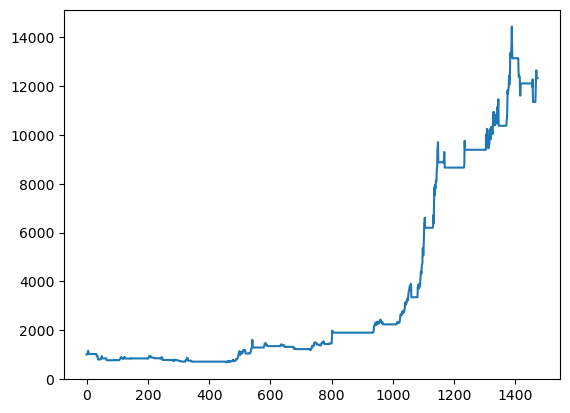

In [7]:
plt.plot(x)

In [180]:
y

,buy,sell,strategy,returns,trade type
0,46,51,1,5.591151,long
1,64,65,1,-9.321319,long
2,89,91,1,0.585529,short
3,105,115,2,10.287905,long
4,118,127,2,-1.359161,long
5,143,145,2,0.483217,short
6,198,211,2,4.243507,long
7,240,248,2,-8.332370,long
8,301,303,1,-0.098404,short
9,317,319,1,3.796599,short


In [179]:
z

-12.269741518663933

In [107]:
compute_returns(strategy1,100,100,100,100,0,84,1000)

(-16.629404987818294, -1)

In [87]:
x[-1]

1145.6404324248902

In [88]:
z


-3.9375461637856572

In [12]:
for i in range(1,101):
    for j in range(1,101):               
        x,y,z,w=compounding_with_2strategies(strategy2_daily,strategy3_daily,i/100,j/100,i/100,j/100)
        print(x[-1]-1000,z,i/100,j/100,i/100,j/100)

3252.3807300979424 -41.837109034889274 0.01 0.01 0.01 0.01
3025.7896085940756 -41.59737058511727 0.01 0.02 0.01 0.02
3187.329775198393 -40.930693656902314 0.01 0.03 0.01 0.03
3959.1441296931034 -38.62140985238721 0.01 0.04 0.01 0.04
2528.838699005493 -42.182639907620924 0.01 0.05 0.01 0.05
2610.7307474973077 -43.007162464200185 0.01 0.06 0.01 0.06
2450.6415717469845 -44.73502864515974 0.01 0.07 0.01 0.07
2450.6415717469845 -44.73502864515974 0.01 0.08 0.01 0.08
2262.7002096406313 -42.95058512505402 0.01 0.09 0.01 0.09
2197.1942151864305 -42.95058512505402 0.01 0.1 0.01 0.1
2197.1942151864305 -42.95058512505402 0.01 0.11 0.01 0.11
2487.1827588637975 -39.496718444596866 0.01 0.12 0.01 0.12
2681.617329182865 -39.496718444596866 0.01 0.13 0.01 0.13
3632.474887790858 -39.496718444596866 0.01 0.14 0.01 0.14
3632.474887790858 -39.496718444596866 0.01 0.15 0.01 0.15
2954.3300538181716 -39.496718444596866 0.01 0.16 0.01 0.16
2954.3300538181716 -39.496718444596866 0.01 0.17 0.01 0.17
2664.424672

3221.860521964878 -40.930693656902314 0.02 0.45 0.02 0.45
3221.860521964878 -40.930693656902314 0.02 0.46 0.02 0.46
3221.860521964878 -40.930693656902314 0.02 0.47 0.02 0.47
3221.860521964878 -40.930693656902314 0.02 0.48 0.02 0.48
3221.860521964878 -40.930693656902314 0.02 0.49 0.02 0.49
3221.860521964878 -40.930693656902314 0.02 0.5 0.02 0.5
3221.860521964878 -40.930693656902314 0.02 0.51 0.02 0.51
3221.860521964878 -40.930693656902314 0.02 0.52 0.02 0.52
3221.860521964878 -40.930693656902314 0.02 0.53 0.02 0.53
3493.3654685644087 -40.930693656902314 0.02 0.54 0.02 0.54
3493.3654685644087 -40.930693656902314 0.02 0.55 0.02 0.55
3493.3654685644087 -40.930693656902314 0.02 0.56 0.02 0.56
3493.3654685644087 -40.930693656902314 0.02 0.57 0.02 0.57
3493.3654685644087 -40.930693656902314 0.02 0.58 0.02 0.58
3493.3654685644087 -40.930693656902314 0.02 0.59 0.02 0.59
3493.3654685644087 -40.930693656902314 0.02 0.6 0.02 0.6
3493.3654685644087 -40.930693656902314 0.02 0.61 0.02 0.61
3493.36546

6053.256996211701 -28.12795671472495 0.03 0.9 0.03 0.9
6053.256996211701 -28.12795671472495 0.03 0.91 0.03 0.91
6053.256996211701 -28.12795671472495 0.03 0.92 0.03 0.92
6053.256996211701 -28.12795671472495 0.03 0.93 0.03 0.93
6053.256996211701 -28.12795671472495 0.03 0.94 0.03 0.94
6053.256996211701 -28.12795671472495 0.03 0.95 0.03 0.95
6053.256996211701 -28.12795671472495 0.03 0.96 0.03 0.96
6053.256996211701 -28.12795671472495 0.03 0.97 0.03 0.97
6053.256996211701 -28.12795671472495 0.03 0.98 0.03 0.98
6053.256996211701 -28.12795671472495 0.03 0.99 0.03 0.99
6053.256996211701 -28.12795671472495 0.03 1.0 0.03 1.0
8533.515643610814 -30.697601088029465 0.04 0.01 0.04 0.01
10004.057373884614 -28.782113132710684 0.04 0.02 0.04 0.02
9249.168418297984 -31.06882220973129 0.04 0.03 0.04 0.03
9427.109536651282 -29.107247349515703 0.04 0.04 0.04 0.04
9270.73046238995 -31.013990441661104 0.04 0.05 0.04 0.05
8947.43576399574 -31.013990441661104 0.04 0.06 0.04 0.06
8848.234788051113 -35.020907970

7563.93476722941 -28.233163713772136 0.05 0.37 0.05 0.37
7563.93476722941 -28.233163713772136 0.05 0.38 0.05 0.38
7411.06768601379 -28.233163713772136 0.05 0.39 0.05 0.39
8164.000250379177 -28.233163713772136 0.05 0.4 0.05 0.4
7684.429952957527 -28.233163713772136 0.05 0.41 0.05 0.41
6138.9430631492105 -28.233163713772136 0.05 0.42 0.05 0.42
6138.9430631492105 -28.233163713772136 0.05 0.43 0.05 0.43
6138.9430631492105 -28.233163713772136 0.05 0.44 0.05 0.44
6268.689895509486 -28.233163713772136 0.05 0.45 0.05 0.45
7830.64256514983 -28.233163713772136 0.05 0.46 0.05 0.46
7830.64256514983 -28.233163713772136 0.05 0.47 0.05 0.47
6268.689895509486 -28.233163713772136 0.05 0.48 0.05 0.48
6268.689895509486 -28.233163713772136 0.05 0.49 0.05 0.49
6268.689895509486 -28.233163713772136 0.05 0.5 0.05 0.5
6268.689895509486 -28.233163713772136 0.05 0.51 0.05 0.51
6268.689895509486 -28.233163713772136 0.05 0.52 0.05 0.52
6268.689895509486 -28.233163713772136 0.05 0.53 0.05 0.53
6736.134343676708 -2

11543.207677580594 -32.00245736601214 0.06 0.79 0.06 0.79
11543.207677580594 -32.00245736601214 0.06 0.8 0.06 0.8
11543.207677580594 -32.00245736601214 0.06 0.81 0.06 0.81
11543.207677580594 -32.00245736601214 0.06 0.82 0.06 0.82
11543.207677580594 -32.00245736601214 0.06 0.83 0.06 0.83
11543.207677580594 -32.00245736601214 0.06 0.84 0.06 0.84
11543.207677580594 -32.00245736601214 0.06 0.85 0.06 0.85
11543.207677580594 -32.00245736601214 0.06 0.86 0.06 0.86
11543.207677580594 -32.00245736601214 0.06 0.87 0.06 0.87
11543.207677580594 -32.00245736601214 0.06 0.88 0.06 0.88
11543.207677580594 -32.00245736601214 0.06 0.89 0.06 0.89
11543.207677580594 -32.00245736601214 0.06 0.9 0.06 0.9
11543.207677580594 -32.00245736601214 0.06 0.91 0.06 0.91
11543.207677580594 -32.00245736601214 0.06 0.92 0.06 0.92
11543.207677580594 -32.00245736601214 0.06 0.93 0.06 0.93
10871.172183991925 -32.00245736601214 0.06 0.94 0.06 0.94
10871.172183991925 -32.00245736601214 0.06 0.95 0.06 0.95
10871.172183991925

11140.795260052617 -34.3521833028358 0.08 0.2 0.08 0.2
13127.493120998974 -34.3521833028358 0.08 0.21 0.08 0.21
11481.463594483965 -34.3521833028358 0.08 0.22 0.08 0.22
11481.463594483965 -34.3521833028358 0.08 0.23 0.08 0.23
9275.77954005343 -32.537706399429865 0.08 0.24 0.08 0.24
9576.861330860313 -31.42927789715358 0.08 0.25 0.08 0.25
9576.861330860313 -31.42927789715358 0.08 0.26 0.08 0.26
8089.475876018865 -31.42927789715358 0.08 0.27 0.08 0.27
8089.475876018865 -31.42927789715358 0.08 0.28 0.08 0.28
7031.23068461521 -31.42927789715358 0.08 0.29 0.08 0.29
7031.23068461521 -31.42927789715358 0.08 0.3 0.08 0.3
8089.475876018865 -31.42927789715358 0.08 0.31 0.08 0.31
8089.475876018865 -31.42927789715358 0.08 0.32 0.08 0.32
7880.273566407162 -31.42927789715358 0.08 0.33 0.08 0.33
7880.273566407162 -31.42927789715358 0.08 0.34 0.08 0.34
7880.273566407162 -31.42927789715358 0.08 0.35 0.08 0.35
7880.273566407162 -31.42927789715358 0.08 0.36 0.08 0.36
11355.621098823134 -31.42927789715358

17189.45870761137 -19.530442392596466 0.09 0.62 0.09 0.62
17565.233361586415 -19.530442392596466 0.09 0.63 0.09 0.63
17565.233361586415 -19.530442392596466 0.09 0.64 0.09 0.64
17565.233361586415 -19.530442392596466 0.09 0.65 0.09 0.65
17565.233361586415 -19.530442392596466 0.09 0.66 0.09 0.66
17565.233361586415 -19.530442392596466 0.09 0.67 0.09 0.67
17565.233361586415 -19.530442392596466 0.09 0.68 0.09 0.68
17565.233361586415 -19.530442392596466 0.09 0.69 0.09 0.69
17565.233361586415 -19.530442392596466 0.09 0.7 0.09 0.7
17565.233361586415 -19.530442392596466 0.09 0.71 0.09 0.71
17565.233361586415 -19.530442392596466 0.09 0.72 0.09 0.72
17565.233361586415 -19.530442392596466 0.09 0.73 0.09 0.73
17565.233361586415 -19.530442392596466 0.09 0.74 0.09 0.74
17565.233361586415 -19.530442392596466 0.09 0.75 0.09 0.75
17565.233361586415 -19.530442392596466 0.09 0.76 0.09 0.76
17565.233361586415 -19.530442392596466 0.09 0.77 0.09 0.77
17565.233361586415 -19.530442392596466 0.09 0.78 0.09 0.78


14783.92076301328 -33.445391340082445 0.11 0.06 0.11 0.06
8798.613515621268 -33.445391340082445 0.11 0.07 0.11 0.07
9866.892512337246 -33.445391340082445 0.11 0.08 0.11 0.08
13032.127810456746 -31.149873418157952 0.11 0.09 0.11 0.09
12706.315811636321 -33.001677704845775 0.11 0.1 0.11 0.1
12706.315811636321 -33.001677704845775 0.11 0.11 0.11 0.11
9329.307415117519 -34.171351428310416 0.11 0.12 0.11 0.12
7106.925176025923 -34.171351428310416 0.11 0.13 0.11 0.13
7665.218347141119 -34.171351428310416 0.11 0.14 0.11 0.14
9981.882048940815 -35.235455000586526 0.11 0.15 0.11 0.15
9981.882048940815 -35.235455000586526 0.11 0.16 0.11 0.16
9981.882048940815 -35.235455000586526 0.11 0.17 0.11 0.17
13180.610725204864 -33.001677704845775 0.11 0.18 0.11 0.18
13180.610725204864 -33.001677704845775 0.11 0.19 0.11 0.19
13234.19637965885 -33.001677704845775 0.11 0.2 0.11 0.2
15563.4546279061 -33.001677704845775 0.11 0.21 0.11 0.21
13635.049024315735 -33.001677704845775 0.11 0.22 0.11 0.22
13635.0490243

9540.167656135327 -31.900872409426416 0.12 0.49 0.12 0.49
9540.167656135327 -31.900872409426416 0.12 0.5 0.12 0.5
9540.167656135327 -31.900872409426416 0.12 0.51 0.12 0.51
9540.167656135327 -31.900872409426416 0.12 0.52 0.12 0.52
9540.167656135327 -31.900872409426416 0.12 0.53 0.12 0.53
13149.809304452607 -31.900872409426416 0.12 0.54 0.12 0.54
13149.809304452607 -31.900872409426416 0.12 0.55 0.12 0.55
13149.809304452607 -31.900872409426416 0.12 0.56 0.12 0.56
11264.9417000038 -31.900872409426416 0.12 0.57 0.12 0.57
11264.9417000038 -31.900872409426416 0.12 0.58 0.12 0.58
11264.9417000038 -31.900872409426416 0.12 0.59 0.12 0.59
11264.9417000038 -31.900872409426416 0.12 0.6 0.12 0.6
11016.689812533363 -31.900872409426416 0.12 0.61 0.12 0.61
11016.689812533363 -31.900872409426416 0.12 0.62 0.12 0.62
11264.9417000038 -31.900872409426416 0.12 0.63 0.12 0.63
11264.9417000038 -31.900872409426416 0.12 0.64 0.12 0.64
11264.9417000038 -31.900872409426416 0.12 0.65 0.12 0.65
11264.9417000038 -31

9801.736499674185 -39.337705073688866 0.13 0.92 0.13 0.92
9801.736499674185 -39.337705073688866 0.13 0.93 0.13 0.93
9583.10101492487 -39.337705073688866 0.13 0.94 0.13 0.94
9583.10101492487 -39.337705073688866 0.13 0.95 0.13 0.95
9583.10101492487 -39.337705073688866 0.13 0.96 0.13 0.96
9583.10101492487 -39.337705073688866 0.13 0.97 0.13 0.97
9801.736499674185 -39.337705073688866 0.13 0.98 0.13 0.98
9801.736499674185 -39.337705073688866 0.13 0.99 0.13 0.99
9801.736499674185 -39.337705073688866 0.13 1.0 0.13 1.0
15007.404738291083 -31.1843075677068 0.14 0.01 0.14 0.01
20648.974732247032 -29.282271966335855 0.14 0.02 0.14 0.02
16961.53387477691 -35.536869590503024 0.14 0.03 0.14 0.03
11058.471792610859 -37.75668173958719 0.14 0.04 0.14 0.04
11186.070191325616 -39.430788227035585 0.14 0.05 0.14 0.05
11186.070191325616 -39.430788227035585 0.14 0.06 0.14 0.06
11186.070191325616 -39.430788227035585 0.14 0.07 0.14 0.07
9472.387560225043 -39.430788227035585 0.14 0.08 0.14 0.08
9416.376584917309

12990.069468257972 -36.24001638652217 0.15 0.35 0.15 0.35
12990.069468257972 -36.24001638652217 0.15 0.36 0.15 0.36
12990.069468257972 -36.24001638652217 0.15 0.37 0.15 0.37
12990.069468257972 -36.24001638652217 0.15 0.38 0.15 0.38
12990.069468257972 -36.24001638652217 0.15 0.39 0.15 0.39
12224.372475480885 -36.24001638652217 0.15 0.4 0.15 0.4
12497.5737878944 -36.24001638652217 0.15 0.41 0.15 0.41
12835.03096405576 -36.24001638652217 0.15 0.42 0.15 0.42
12835.03096405576 -36.24001638652217 0.15 0.43 0.15 0.43
12835.03096405576 -36.24001638652217 0.15 0.44 0.15 0.44
12554.999257909314 -36.24001638652217 0.15 0.45 0.15 0.45
12554.999257909314 -36.24001638652217 0.15 0.46 0.15 0.46
10402.235688473695 -36.24001638652217 0.15 0.47 0.15 0.47
10402.235688473695 -36.24001638652217 0.15 0.48 0.15 0.48
10402.235688473695 -36.24001638652217 0.15 0.49 0.15 0.49
10402.235688473695 -36.24001638652217 0.15 0.5 0.15 0.5
10402.235688473695 -36.24001638652217 0.15 0.51 0.15 0.51
10402.235688473695 -36.

7861.507098663709 -51.73532183923479 0.16 0.8 0.16 0.8
7861.507098663709 -51.73532183923479 0.16 0.81 0.16 0.81
7861.507098663709 -51.73532183923479 0.16 0.82 0.16 0.82
7861.507098663709 -51.73532183923479 0.16 0.83 0.16 0.83
7861.507098663709 -51.73532183923479 0.16 0.84 0.16 0.84
7861.507098663709 -51.73532183923479 0.16 0.85 0.16 0.85
7861.507098663709 -51.73532183923479 0.16 0.86 0.16 0.86
8044.5763046926 -51.73532183923479 0.16 0.87 0.16 0.87
8044.5763046926 -51.73532183923479 0.16 0.88 0.16 0.88
8044.5763046926 -51.73532183923479 0.16 0.89 0.16 0.89
8044.5763046926 -51.73532183923479 0.16 0.9 0.16 0.9
9353.459583823204 -51.73532183923479 0.16 0.91 0.16 0.91
9353.459583823204 -51.73532183923479 0.16 0.92 0.16 0.92
9353.459583823204 -51.73532183923479 0.16 0.93 0.16 0.93
9353.459583823204 -51.73532183923479 0.16 0.94 0.16 0.94
9353.459583823204 -51.73532183923479 0.16 0.95 0.16 0.95
9353.459583823204 -51.73532183923479 0.16 0.96 0.16 0.96
9353.459583823204 -51.73532183923479 0.16 0

4717.434261004553 -59.76987628909616 0.18 0.25 0.18 0.25
4717.434261004553 -59.76987628909616 0.18 0.26 0.18 0.26
4717.434261004553 -59.76987628909616 0.18 0.27 0.18 0.27
4717.434261004553 -59.76987628909616 0.18 0.28 0.18 0.28
4900.944807870755 -59.76987628909616 0.18 0.29 0.18 0.29
4900.944807870755 -59.76987628909616 0.18 0.3 0.18 0.3
4717.434261004553 -59.76987628909616 0.18 0.31 0.18 0.31
4717.434261004553 -59.76987628909616 0.18 0.32 0.18 0.32
6660.88121369573 -59.76987628909616 0.18 0.33 0.18 0.33
6660.88121369573 -59.76987628909616 0.18 0.34 0.18 0.34
6660.88121369573 -59.76987628909616 0.18 0.35 0.18 0.35
6660.88121369573 -59.76987628909616 0.18 0.36 0.18 0.36
6660.88121369573 -59.76987628909616 0.18 0.37 0.18 0.37
6660.88121369573 -59.76987628909616 0.18 0.38 0.18 0.38
6660.88121369573 -59.76987628909616 0.18 0.39 0.18 0.39
6241.589964237786 -59.76987628909616 0.18 0.4 0.18 0.4
6391.193424504689 -59.76987628909616 0.18 0.41 0.18 0.41
6575.983024523972 -59.76987628909616 0.18 

KeyboardInterrupt: 